---
title: "Manipulação de Dados - Exercícios"
author: "Gustavo J. V. Meira Filho"
format:
    pdf:
        documentclass: scrreprt
        pdf-engine: xelatex
        toc: true
        toc-depth: 3
        include-in-header: 
            text: |
                \usepackage[a4paper,margin=2.5cm]{geometry}
        execute:
            echo: true     
            warning: false   
            message: false 
execute:
    fig-format: png       
jupyter: AIChE-Internal-Challenges
---

In [108]:
# Nativas Python
import sys
import os

# Dados Tabulares
import pandas as pd
import numpy as np

# Visualização
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
from graphmodex import plotlymodex

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
equipamentos = pd.DataFrame({
    'tipo': [
        # Reatores
        'Batela', 'Contínuo', 'PFR', 'CSTR', 
        'Batela Alimentado', 'Contínuo de Leito Fixo', 
        'Contínuo de Leito Fluidizado', 'Semi-Batela',
        
        # Separação
        'Destilador de Prato', 'Coluna de Absorção', 'Filtro Prensa',
        'Filtro Rotativo a Vácuo', 'Secador Spray Dryer',
        
        # Transporte e bombeamento
        'Bomba Centrífuga', 'Compressor de Ar', 
        'Trocador de Calor de Placas',
        'Trocador de Calor Casco e Tubo', 'Válvula de Controle', 
        'Misturador de Hélice',
        'Torre de Resfriamento', 'Tanque de Armazenamento', 
        'Torre de Extração Líquido-Líquido'
    ],
    
    'volume': [
        500, 1200, 800, 950, np.nan, 1500, 2000, 700,  # reatores
        np.nan, 850, np.nan, np.nan, 1200,             # separação
        150, np.nan, 300, 500, np.nan, 400, 2000, 5000, 900  
        # transporte e utilidades
    ],
    
    'conversao': [
        85, 92, 88, 80, 90, 95, 97, np.nan,   # reatores
        np.nan, np.nan, np.nan, np.nan, np.nan,   # separação
        np.nan, np.nan, np.nan, np.nan, np.nan, 
        np.nan, np.nan, np.nan, np.nan   # transporte
    ],
    
    'temperatura': [
        60, 70, 75, 65, 68, 80, 78, 70,        # reatores
        120, 45, 25, 35, 180,                  # separação
        25, 40, 90, 150, 25, 60, 35, 30, 40    # transporte
    ],
    
    'custo_usd_1000': [
        50, 80, 120, 100, 90, 150, 180, 70,     # reatores
        250, 200, 60, 90, 300,                  # separação
        30, 70, 120, 200, 20, 50, 180, 220, 250 # transporte
    ],
    
    'op': [
        'reacao', 'reacao', 'reacao', 'reacao', 'reacao',
        'reacao', 'reacao', 'reacao',
        'separacao', 'separacao', 'separacao', 'separacao', 'separacao',
        'transporte', 'transporte', 'troca termica', 'troca termica',
        'controle', 'mistura', 'utilidades', 'armazenamento', 'separacao'
    ]
})
equipamentos.to_csv(r'../data/equipamentos.csv', index=False)

catalisadores = pd.DataFrame({
    'tipo': ['PFR', 'CSTR', 'Contínuo de Leito Fixo', 
             'Contínuo de Leito Fluidizado',],
    'catalisador': ['Ni/Al2O3', 'Pt/SiO2', 'Zeólita Y', 'Fe-Cr',],
    'aplicacao': ['Hidrogenação', 'Oxidação', 'Craqueamento', 
                  'Reforma a vapor'],
    'custo_usd_1000_por_L': [
        0.35,   # Ni/Al2O3 – catalisador de hidrogenação (barato)
        1.20,   # Pt/SiO2 – nobre, alto custo
        0.80,   # Zeólita Y – usado em craqueamento catalítico
        0.50,   # Fe-Cr – moderado, comum em reformadores
    ]
})
catalisadores.to_csv(r'../data/catalisadores.csv', index=False)

\newpage

# **Exercício 1: Explorando Dados de Reatores**

Você recebeu uma base de dados chamada `reatores.csv`, contendo informações sobre diferentes tipos de reatores utilizados em processos químicos. Essa base possui as seguintes colunas:

| Coluna          | Descrição                                    |
| --------------- | -------------------------------------------- |
| tipo        | Tipo de reator (Batela, Contínuo, PFR, etc.) |
| volume      | Volume operacional do reator (em L)          |
| conversao   | Conversão média do reagente (em %)           |
| temperatura | Temperatura média de operação (°C)           |

Utilize o pandas para analisar os dados.

---

1. Leitura dos dados:
   Importe a biblioteca `pandas` e leia o arquivo `reatores.csv` em um DataFrame chamado `reatores`.

2. Exploração inicial:

   * Quantas linhas e colunas há na base?
   * Alguma coluna possui valores ausentes?
   * Qual a média do volume dos reatores?

3. Filtragem de dados:
   Encontre os seguintes reatores:

   * Reatores com temperatura abaixo de 70°C e volume acima de 400 L.

In [131]:
equipamentos = pd.read_csv(r'../data/equipamentos.csv')
catalisadores = pd.read_csv(r'../data/catalisadores.csv')
reatores = equipamentos[equipamentos['op'] == 'reacao'].copy()

In [132]:
reatores.query('temperatura < 70 and volume > 400')

,tipo,volume,conversao,temperatura,custo_usd_1000,op
0,Batela,500.0,85.0,60,50,reacao
3,CSTR,950.0,80.0,65,100,reacao


In [133]:
reatores[
    (reatores['temperatura'] < 70) 
    & (reatores['volume'] > 400)
]

,tipo,volume,conversao,temperatura,custo_usd_1000,op
0,Batela,500.0,85.0,60,50,reacao
3,CSTR,950.0,80.0,65,100,reacao


\newpage
# <span style="color:#e34a4a">**Exercício 2: Único Reator Possível**

A empresa AIChE está tentando selecionar um reator específico para um novo processo químico. Infelizmente não há muitas opções disponíveis, e eles precisam encontrar o reator que atenda a todos os seguintes critérios:
- Volume abaixo 1400 L (não temos um espaço muito grande para colocar ele);
- Conversão maior que 90% (precisamos do lucro maximizado);
- Temperatura de operação igual ou abaixo de 70 °C (o material não aguenta mais do que isso).

Qual reator devemos selecionar?

In [134]:
reatores[
    (
        (reatores['temperatura'] <= 70) 
        & (reatores['volume'] < 1400)
    )
    & (reatores['conversao'] > 90)
]

,tipo,volume,conversao,temperatura,custo_usd_1000,op
1,Contínuo,1200.0,92.0,70,80,reacao


\newpage

# **Exercício 3: Feature Engineering**

Algumas informações pré-processadas possuem mais valor do que variáveis cruas! Crie uma nova coluna chamada `rendimento`, que é definida como o produto da conversão (em decimal) pela temperatura de operação (°C):

$$\text{Rendimento} = \dfrac{100* \text{Conversão }(\%)}{\text{Temperatura }(°\text{C})}$$

Exclua do seu `df` qualquer reator que não possua um valor de rendimento atribuído.  

In [135]:
reatores['rendimento'] = (reatores['conversao'] / 100) * reatores['temperatura'] 

In [136]:
reatores = reatores.dropna(subset=['rendimento'])
reatores[['tipo', 'conversao', 'temperatura', 'rendimento']]

,tipo,conversao,temperatura,rendimento
0,Batela,85.0,60,51.00
1,Contínuo,92.0,70,64.40
2,PFR,88.0,75,66.00
3,CSTR,80.0,65,52.00
4,Batela Alimentado,90.0,68,61.20
5,Contínuo de Leito Fixo,95.0,80,76.00
6,Contínuo de Leito Fluidizado,97.0,78,75.66


\newpage

# **Exercício 4: Melhor Custo Benefício**

Olhando só para a conversão e para o custo, qual reator apresenta o melhor custo-benefício?

In [145]:
reatores.sort_values(
    by=['conversao', 'custo_usd_1000'], 
    ascending=[False, True]
)[
    ['tipo', 'conversao', 'custo_usd_1000']
]

,tipo,conversao,custo_usd_1000
6,Contínuo de Leito Fluidizado,97.0,180
5,Contínuo de Leito Fixo,95.0,150
1,Contínuo,92.0,80
4,Batela Alimentado,90.0,90
2,PFR,88.0,120
0,Batela,85.0,50
3,CSTR,80.0,100


In [146]:
reatores.sort_values(
    by=['custo_usd_1000', 'conversao'], 
    ascending=[True, False]
)[
    ['tipo', 'conversao', 'custo_usd_1000']
]

,tipo,conversao,custo_usd_1000
0,Batela,85.0,50
1,Contínuo,92.0,80
4,Batela Alimentado,90.0,90
3,CSTR,80.0,100
2,PFR,88.0,120
5,Contínuo de Leito Fixo,95.0,150
6,Contínuo de Leito Fluidizado,97.0,180


\newpage

# **Exercício 5: Agregação**

Quantas opções de cada equipamento nós temos para avaliar e considerar durante a construção de uma planta industrial? Utilize o DataFrame `equipamentos` para responder essa pergunta. Lembre-se que a coluna `op` indica a operação do equipamento (Reação, Separação, Transporte, etc).

Também veja qual é o custo médio (em milhares de USD) para cada tipo de equipamento.

Se precisarmos de **um equipamento de cada tipo**, qual seria o custo total estimado?

In [139]:
info_media_equipamentos = equipamentos.groupby('op').agg(
    {'op':'count', 'custo_usd_1000':'mean'}
)
info_media_equipamentos

,op,custo_usd_1000
op,,
armazenamento,1,220.000000
controle,1,20.000000
mistura,1,50.000000
reacao,8,105.000000
separacao,6,191.666667
transporte,2,50.000000
troca termica,2,160.000000
utilidades,1,180.000000


In [140]:
print(f'quantidade de equipamentos = {len(info_media_equipamentos)}')
print(f'custo total estimado = U$ {
    1000* info_media_equipamentos["custo_usd_1000"].sum():.2f
}')

quantidade de equipamentos = 8
custo total estimado = U$ 976666.67


# <span style="color:#e34a4a">**Exercício 6: Merging**

A empresa AIChE está planejando construir uma nova planta industrial e precisa combinar informações de diferentes fontes de dados. Você recebeu dois DataFrames: `reatores` e `catalisadores`. O DataFrame `reatores` contém informações sobre diferentes tipos de reatores, enquanto o DataFrame `catalisadores` possui dados sobre catalisadores utilizados em processos químicos. Ambos os DataFrames possuem uma coluna em comum chamada `tipo`, que indica o tipo de reator ou catalisador.

Una as duas bases de dados e trabalhe somente com os reatores que possuem catalisadores associados. Crie uma coluna que indique o custo total do reator mais o catalisador (em milhares de USD), considerando o volume do reator. depois, encontre o reator + catalisador com o menor custo total!

In [148]:
reatores_catalisadores = pd.merge(
    reatores, catalisadores, on='tipo', how='inner'
)
reatores_catalisadores[[
    'conversao', 'custo_usd_1000', 
    'catalisador', 'aplicacao', 'custo_usd_1000_por_L'
]]

,conversao,custo_usd_1000,catalisador,aplicacao,custo_usd_1000_por_L
0,88.0,120,Ni/Al2O3,Hidrogenação,0.35
1,80.0,100,Pt/SiO2,Oxidação,1.20
2,95.0,150,Zeólita Y,Craqueamento,0.80
3,97.0,180,Fe-Cr,Reforma a vapor,0.50


In [150]:
reatores_catalisadores['custo_total_usd_1000'] = (
    reatores_catalisadores['custo_usd_1000'] +
    reatores_catalisadores['custo_usd_1000_por_L'] * 
    reatores_catalisadores['volume']
)
reatores_catalisadores[[
    'tipo', 'catalisador', 'custo_total_usd_1000', 'conversao', 
    'custo_usd_1000', 'custo_usd_1000_por_L', 'volume'
]].sort_values(by='custo_total_usd_1000')[[
    'tipo', 'catalisador', 'custo_total_usd_1000', 'conversao', 
]]

,tipo,catalisador,custo_total_usd_1000,conversao
0,PFR,Ni/Al2O3,400.0,88.0
3,Contínuo de Leito Fluidizado,Fe-Cr,1180.0,97.0
1,CSTR,Pt/SiO2,1240.0,80.0
2,Contínuo de Leito Fixo,Zeólita Y,1350.0,95.0


# **Exercício 7: COrrelacionando as Variáveis dos Equipamentos**

Utilize a biblioteca `seaborn` para criar um heatmap que mostre a correlação entre as variáveis numéricas do DataFrame `reatores` e `equipamentos` (não reatores). Quais variáveis parecem estar mais correlacionadas entre si?

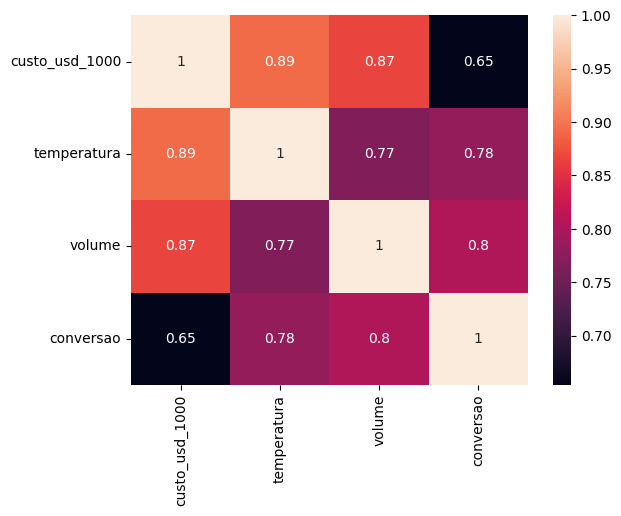

In [143]:
sns.heatmap(reatores[
    ['custo_usd_1000', 'temperatura', 'volume', 'conversao']
].corr(), annot=True);

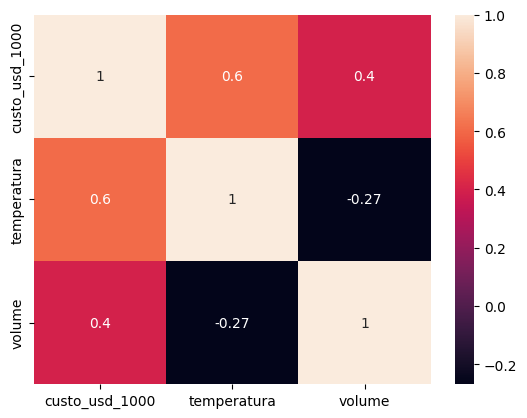

In [144]:
sns.heatmap(equipamentos.query("op != 'reacao'")[
    ['custo_usd_1000', 'temperatura', 'volume']
].corr(), annot=True);